# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
url = 'Housing.csv'

data = pd.read_csv(url)
print(data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


## Own solution

[[2.80827349e-16 4.39443883e-01 1.60698000e-01 3.72186112e-01]]
0.2559879175413656


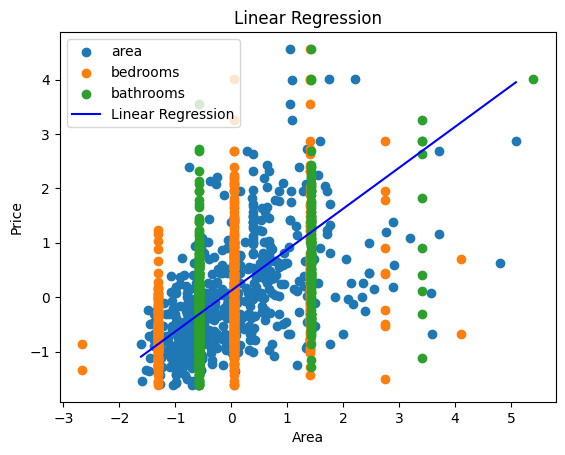

In [3]:
df = pd.DataFrame(
    np.array(data[['price', 'area', 'bedrooms', 'bathrooms']]),
    columns=['price', 'area', 'bedrooms', 'bathrooms']
)

df = (df - df.mean()) / df.std()
X = df.iloc[:, 1:4]
ones = np.ones([X.shape[0], 1])
X = np.concatenate((ones, X), axis=1)

y = df.iloc[:, 0:1].values

w = np.zeros([1, 4])

alpha = 0.01
iters = 1000

# функція гіпотези лінійної регресії у векторному вигляді
def hypothesis(X, w):
    return X @ w.T

# функція для обчислення функції втрат у векторному вигляді
def computeCost(X, y, w):
    tobesummed = np.power((hypothesis(X, w) - y), 2)
    return np.sum(tobesummed) / (2 * len(X))

# крок градієнтного спуску
def gradientDescent(X, y, w, iters, alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        w = w - (alpha / len(X)) * np.sum(X * (hypothesis(X, w) - y), axis=0)
        cost[i] = computeCost(X, y, w)
    return w, cost

g, cost = gradientDescent(X, y, w, iters, alpha)
print(g)

finalCost = computeCost(X, y, g)
print(finalCost)

plt.scatter(df['area'], df['price'], label='area')
plt.scatter(df['bedrooms'], df['price'], label='bedrooms')
plt.scatter(df['bathrooms'], df['price'], label='bathrooms')
plt.plot([df['area'].min(), df['area'].max()], [hypothesis(X, g).min(), hypothesis(X, g).max()], '-b', label='Linear Regression')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.legend()
plt.show()

## Sklearn solution

[[0.43945209 0.16052866 0.37234442]]
0.2559879006532141


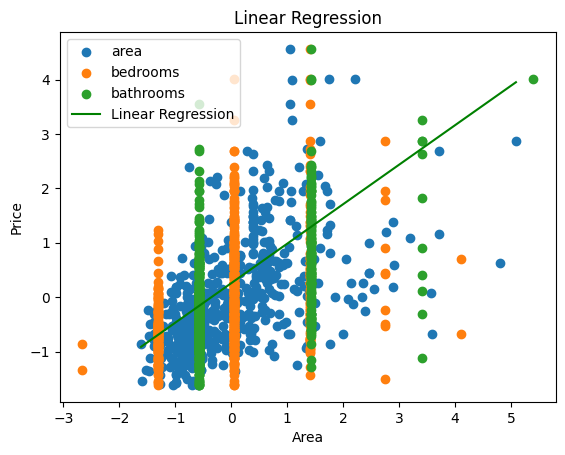

In [4]:
model = LinearRegression()

X_sk = df.iloc[:, 1:4]
y_sk = df.iloc[:, 0:1].values
sorted_indices = np.argsort(X_sk['area'])
X_sorted = X_sk.iloc[sorted_indices]
y_sorted = y_sk[sorted_indices]

model.fit(X_sorted, y_sorted)

w = model.coef_
print(w)

finalCost_sklearn = mean_squared_error(y_sorted, model.predict(X_sorted)) / 2
print(finalCost_sklearn)

plt.scatter(X_sorted['area'], y_sorted, label='area')
plt.scatter(X_sorted['bedrooms'], y_sorted, label='bedrooms')
plt.scatter(X_sorted['bathrooms'], y_sorted, label='bathrooms')
plt.plot([X_sorted['area'].iloc[0], X_sorted['area'].iloc[-1]], [model.predict(X_sorted)[0], model.predict(X_sorted)[-1]], '-g', label='Linear Regression')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.legend()
plt.show()

## Analytical solution

[[-3.03013178e-16  4.39452085e-01  1.60528660e-01  3.72344423e-01]]
0.2559879006532141


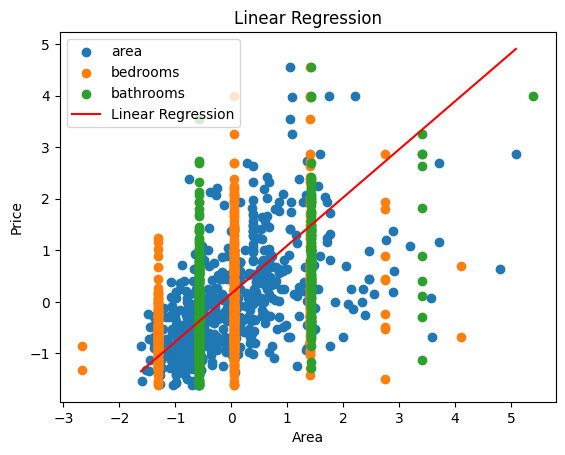

In [5]:
w_li = np.linalg.inv(X.T @ X) @ X.T @ y

def hypothesis_li(X, w):
    return np.dot(X, w)

def computeCost_li(X, y, w):
    m = len(X)
    predictions = hypothesis_li(X, w_li)
    squared_errors = np.power(predictions - y, 2)
    cost = np.sum(squared_errors) / (2 * m)
    return cost

g_li = w_li.T
print(g_li)

finalCost = computeCost_li(X, y, g_li.T)
print(finalCost)

plt.scatter(df['area'], df['price'], label='area')
plt.scatter(df['bedrooms'], df['price'], label='bedrooms')
plt.scatter(df['bathrooms'], df['price'], label='bathrooms')
plt.plot([df['area'].min(), df['area'].max()], [np.dot([1, df['area'].min(), df['bedrooms'].min(), df['bathrooms'].min()], g_li.T), np.dot([1, df['area'].max(), df['bedrooms'].max(), df['bathrooms'].max()], g_li.T)], '-r', label='Linear Regression')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.legend()
plt.show()


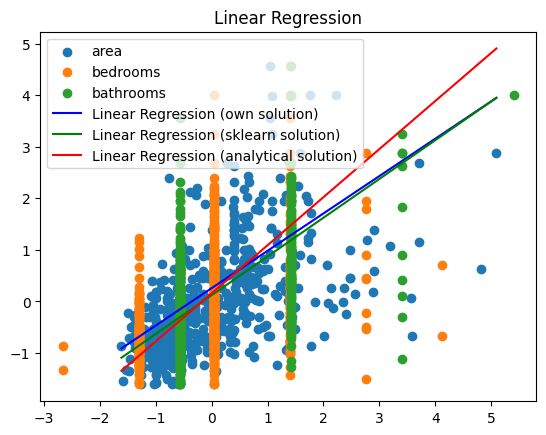

In [6]:
plt.scatter(X_sorted['area'], y_sorted, label='area')
plt.scatter(X_sorted['bedrooms'], y_sorted, label='bedrooms')
plt.scatter(X_sorted['bathrooms'], y_sorted, label='bathrooms')
plt.plot([X_sorted['area'].iloc[0], X_sorted['area'].iloc[-1]], [model.predict(X_sorted)[0], model.predict(X_sorted)[-1]], '-b', label='Linear Regression (own solution)')
plt.plot([df['area'].min(), df['area'].max()], [hypothesis(X, g).min(), hypothesis(X, g).max()], '-g', label='Linear Regression (sklearn solution)')
plt.plot([df['area'].min(), df['area'].max()], [np.dot([1, df['area'].min(), df['bedrooms'].min(), df['bathrooms'].min()], g_li.T), np.dot([1, df['area'].max(), df['bedrooms'].max(), df['bathrooms'].max()], g_li.T)], '-r', label='Linear Regression (analytical solution)')
plt.title('Linear Regression')
plt.legend()
plt.show()

## Висновок
Результати, отримані різними методами (власне рішення, використання бібліотеки sklearn та аналітичне рішення ), є майже однаковими.

Значення вагових коефіцієнтів (w) для кожного методу мають невеликі відмінності у числових значеннях, але загальна структура вагових коефіцієнтів є подібною. Це показує, що всі три методи дають приблизно однакові результати.

Значення фінальної вартості (finalcost) для всіх трьох методів також майже ідентичні. Це свідчить про те, що моделі лінійної регресії, побудовані різними методами, мають подібну точність у прогнозуванні.

Отже, можна зробити висновок, що незалежно від методу, застосованого для лінійної регресії, отримані результати є подібними та надійними. Це підтверджує стабільність та достовірність лінійної регресії як методу прогнозування у даному контексті.
